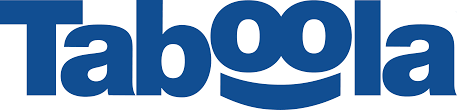

# Taboola CTR Value-For-Money Prediction
---

> Catboost, xgboost basline

> some fully connected network

In [1]:
from collections import Counter
import pandas as pd
import logging
import os
import numpy as np
import scipy.sparse
import xgboost as xgb
import s3fs

## Data

In [2]:
import sys
sys.path.append("/home/ec2-user/SageMaker/recsys-bgu")

In [3]:
train_data_1 = pd.read_csv('s3://jumio-altimo/raw/part-00002.csv')
train_data_2 = pd.read_csv('s3://jumio-altimo/raw/part-00016.csv')

In [4]:
train_data_3 = pd.read_csv('s3://jumio-altimo/raw/part-00025.csv')
train_data_4 = pd.read_csv('s3://jumio-altimo/raw/part-00037.csv')

In [5]:
train_data_5 = pd.read_csv('s3://jumio-altimo/raw/part-00047.csv')
train_data_6 = pd.read_csv('s3://jumio-altimo/raw/part-00056.csv')

In [25]:
test_data = pd.read_csv('/home/ec2-user/SageMaker/recsys-bgu/kaggle/exploration/raw_data/test_file.csv')

In [7]:
train_files = [train_data_1, train_data_2, train_data_3, train_data_4, train_data_5, train_data_6]

In [8]:
train = pd.concat([file for file in train_files], axis=0)

In [9]:
train.shape

(2613946, 23)

In [10]:
from kaggle.preprocess.ohe_features import OHEFeaturesProcessor

features_processor = OHEFeaturesProcessor()
features_processor.fit(train)
len(features_processor.features_names)

28576

In [11]:
X_train = features_processor.transform(train)
X_train.shape

(2613946, 27797)

In [26]:
test = features_processor.transform(test_data)

In [27]:
test.shape

(999528, 27797)

# Xgboost

In [14]:
model = xgb.XGBClassifier(n_estimators= 100, max_depth=5)

In [15]:
model.fit(X_train, list(train.is_click))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
test_data.head()

,page_view_start_time,user_id_hash,target_id_hash,syndicator_id_hash,campaign_id_hash,empiric_calibrated_recs,empiric_clicks,target_item_taxonomy,placement_id_hash,user_recs,...,source_id_hash,source_item_type,browser_platform,os_family,country_code,region,day_of_week,time_of_day,gmt_offset,Id
0,1587347971815,3fb5d9495b4b6165e83fd9fdeacd2f0293d20318bbd0a7...,ebd8438008f730178f63ac07d7e0398172451f28dc6390...,23fe2e33a8ac9193b148e252963cc7580757e0b0422010...,3287fbfb314c76ec3b9d4209628b6b8d25bc04772c7595...,6501.1090,18657.0,UNKNOWN,736ce0a301eb0c3da05800df13949e411684c97236aa22...,683.0,...,4c7987d659b97d2007c45bb3c9fd903b135a2ef18130f7...,homepage,DESK,5,US,TX,0,20,-500,0
1,1587359560809,26bd0dea68c5f65c286ead5f6a69218486cc965535ae39...,79f2e0095aca1d3afac3a4918f2fc77aa3dd386537447a...,377402b6b9107d4c2d3d7cd40218ab1578ffd15554a2c7...,26443482ee16a2b3653fab3cbf84eb2c3931520a985db5...,1360.8755,7444.0,SPORTS~FIGHTING,911f042701f83ed9e2c3ee0951dd2f9e1dc0302ca5a03a...,83.0,...,c83159630182a5b7bc3c3fc985156c03b2a43129d63376...,homepage,DESK,6,US,AZ,0,22,-700,1
2,1587397303992,1f4ab77f1707596f99861d16b3ca177eefc86dc0fbc4b9...,8b0b508ee3e64a6394ba199fc546afb8bb8423ed5fd560...,0ca265400306058ef19da77fc2486a6be975aa9cddb8f4...,3bd3fc41bbee44113f90a42d246666088459ba3b57c58c...,7411.1694,32410.0,UNKNOWN,e317ff755817004b9268a99b1671e53f73b44535c926ed...,2829.0,...,389b69708cf58731e78e2e023a8c608d886fe5aebc0e23...,category,DESK,6,US,NC,1,11,-400,2
3,1587341629681,f183602e0fe86592a106e62230d05ecc02212be60def80...,1077d1cd2590b9318ce5bf1b63f323706d9b3734234640...,fe55e950d29575f0dd1a02958cedaeb271ca167482c1bc...,1b40924dcbe3fe73d7ba308be724d722c6279ace116e78...,62687.1170,70074.0,LIFE~HEALTH-AND-FITNESS,736ce0a301eb0c3da05800df13949e411684c97236aa22...,59.0,...,4c7987d659b97d2007c45bb3c9fd903b135a2ef18130f7...,homepage,DESK,6,US,IN,0,20,-400,3
4,1587409279745,b94e3fe0943987d4139f13b7e250a055b78d6b3c7f6805...,6cfd767d66e6eebf5d9189084468aa98c7e2a879239c28...,c7375d39e509e304c7227d74acbb320a838711c73d4bb7...,1c8cde564ce4aa20b8e4722d5587d9af2e7ca23bfc0086...,18061.8930,19145.0,BUSINESS,51211bda213f6341e3a7db1f2ffa866075e5484f31b544...,56.0,...,c26defddc8604a0e23963eaccbfa40bd1f172f4e3cc5a9...,photo,DESK,6,US,GA,1,15,-400,4


In [28]:
predictions = model.predict(test)


array([1., 1., 1., 1., 0.])

In [34]:
output = test_data.filter([id])

In [35]:
output.assign()

""
0
1
2
3
4


In [39]:
output = output.assign(Predicted = predictions )

In [41]:
output.to_csv('submission1.csv')

In [30]:
predictions.shape

(999528,)

# AUC

In [29]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(test_data.is_click, predictions)
roc_auc = metrics.auc(fpr, tpr)

AttributeError: 'DataFrame' object has no attribute 'is_click'

In [20]:
roc_auc

0.7716002183162046